In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd

df17 = pd.read_csv('/content/drive/MyDrive/machine_learning_1/FIFA17_official_data.csv', encoding="UTF-8")
df23 = pd.read_csv('/content/drive/MyDrive/machine_learning_1/FIFA23_official_data.csv', encoding="UTF-8")

In [85]:
df17 = pd.DataFrame(df17, columns=['Name','Value','Wage','Overall'])
df23 = pd.DataFrame(df23, columns=['Name','Value','Wage','Overall'])

In [86]:
import re

def convert_to_number(string):
    value = float(re.findall(r'\d+\.\d+|\d+', string)[0])
    if 'M' in string:
        value *= 1000000
    elif 'K' in string:
        value *= 1000
    elif 'B' in string:
        value *= 1000000000
    return int(value)

In [87]:
df17["Value"] = df17['Value'].apply(convert_to_number)
df17["Wage"] = df17['Wage'].apply(convert_to_number)
df17['difference']=df17['Value']-df17['Wage']

In [88]:
df23["Value"] = df23['Value'].apply(convert_to_number)
df23["Wage"] = df23['Wage'].apply(convert_to_number)
df23['difference']=df23['Value']-df23['Wage']

In [89]:
df17.sort_values(by=['difference'], ascending=False, inplace=True)
df23.sort_values(by=['difference'], ascending=False, inplace=True)

In [90]:
# df3 = df2[df2['Value']<80000000][df2['Wage']<300000][df2['Overall']>85]

# print(df3.shape)
# df3.head()

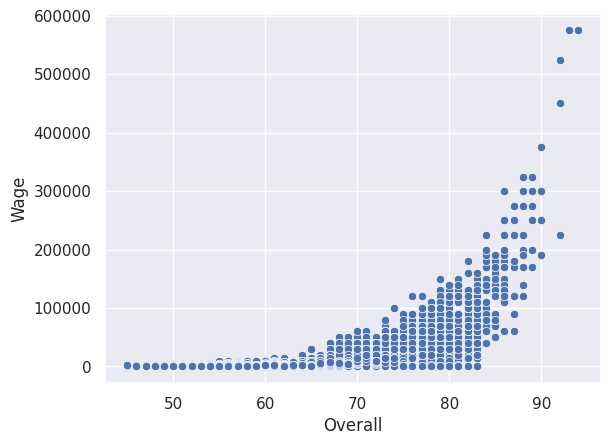

In [91]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x="Overall", y='Wage', data=df17)

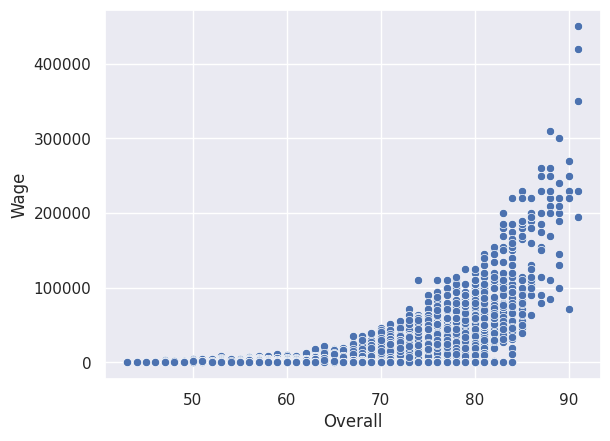

In [92]:
graph = sns.scatterplot(x="Overall", y='Wage', data=df23)

In [93]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool
from bokeh.io import output_notebook
# output_notebook()

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name")]
)

p = figure(title="Fifa 2017", x_axis_label='Wage', y_axis_label='Value', width=800, height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=7, source=df17)
show(p)

In [94]:
p = figure(title="Fifa 2023", x_axis_label='Wage', y_axis_label='Value', width=800, height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=7, source=df23)
show(p)